In [1]:
%matplotlib notebook
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
xs = np.array([37.0, 39.738082885742188, 39.610107421875, 40.098846435546875, 40.170627593994141, 40.197734832763672, 40.203163146972656, 40.197345733642578, 40.200531005859375])
ys = np.array([62.0, 64.57666015625, 66.54449462890625, 67.677383422851562, 67.620948791503906, 67.599472045898438, 67.602081298828125, 67.602737426757812, 67.603736877441406])
n_pts = len(ys)

In [3]:
# method 1
x_prime = np.gradient(xs, edge_order=2)
y_prime = np.gradient(ys, edge_order=2)
xy_prime_mag = np.linalg.norm(np.column_stack((x_prime, y_prime)), axis=1)

Tx = x_prime / xy_prime_mag
Ty = y_prime / xy_prime_mag

Tx_prime = np.gradient(Tx)
Ty_prime = np.gradient(Ty)
Txy_prime_mag = np.linalg.norm(np.column_stack((Tx_prime, Ty_prime)), axis=1)

K1 = Txy_prime_mag / xy_prime_mag

In [4]:
# method 2
dx = np.gradient(xs, edge_order=2)
dy = np.gradient(ys, edge_order=2)
ddx = np.gradient(dx)
ddy = np.gradient(dy)

num = dx*ddy - dy*ddx
denom = (dx*dx + dy*dy)**(3/2)

K2 = num / denom

<IPython.core.display.Javascript object>


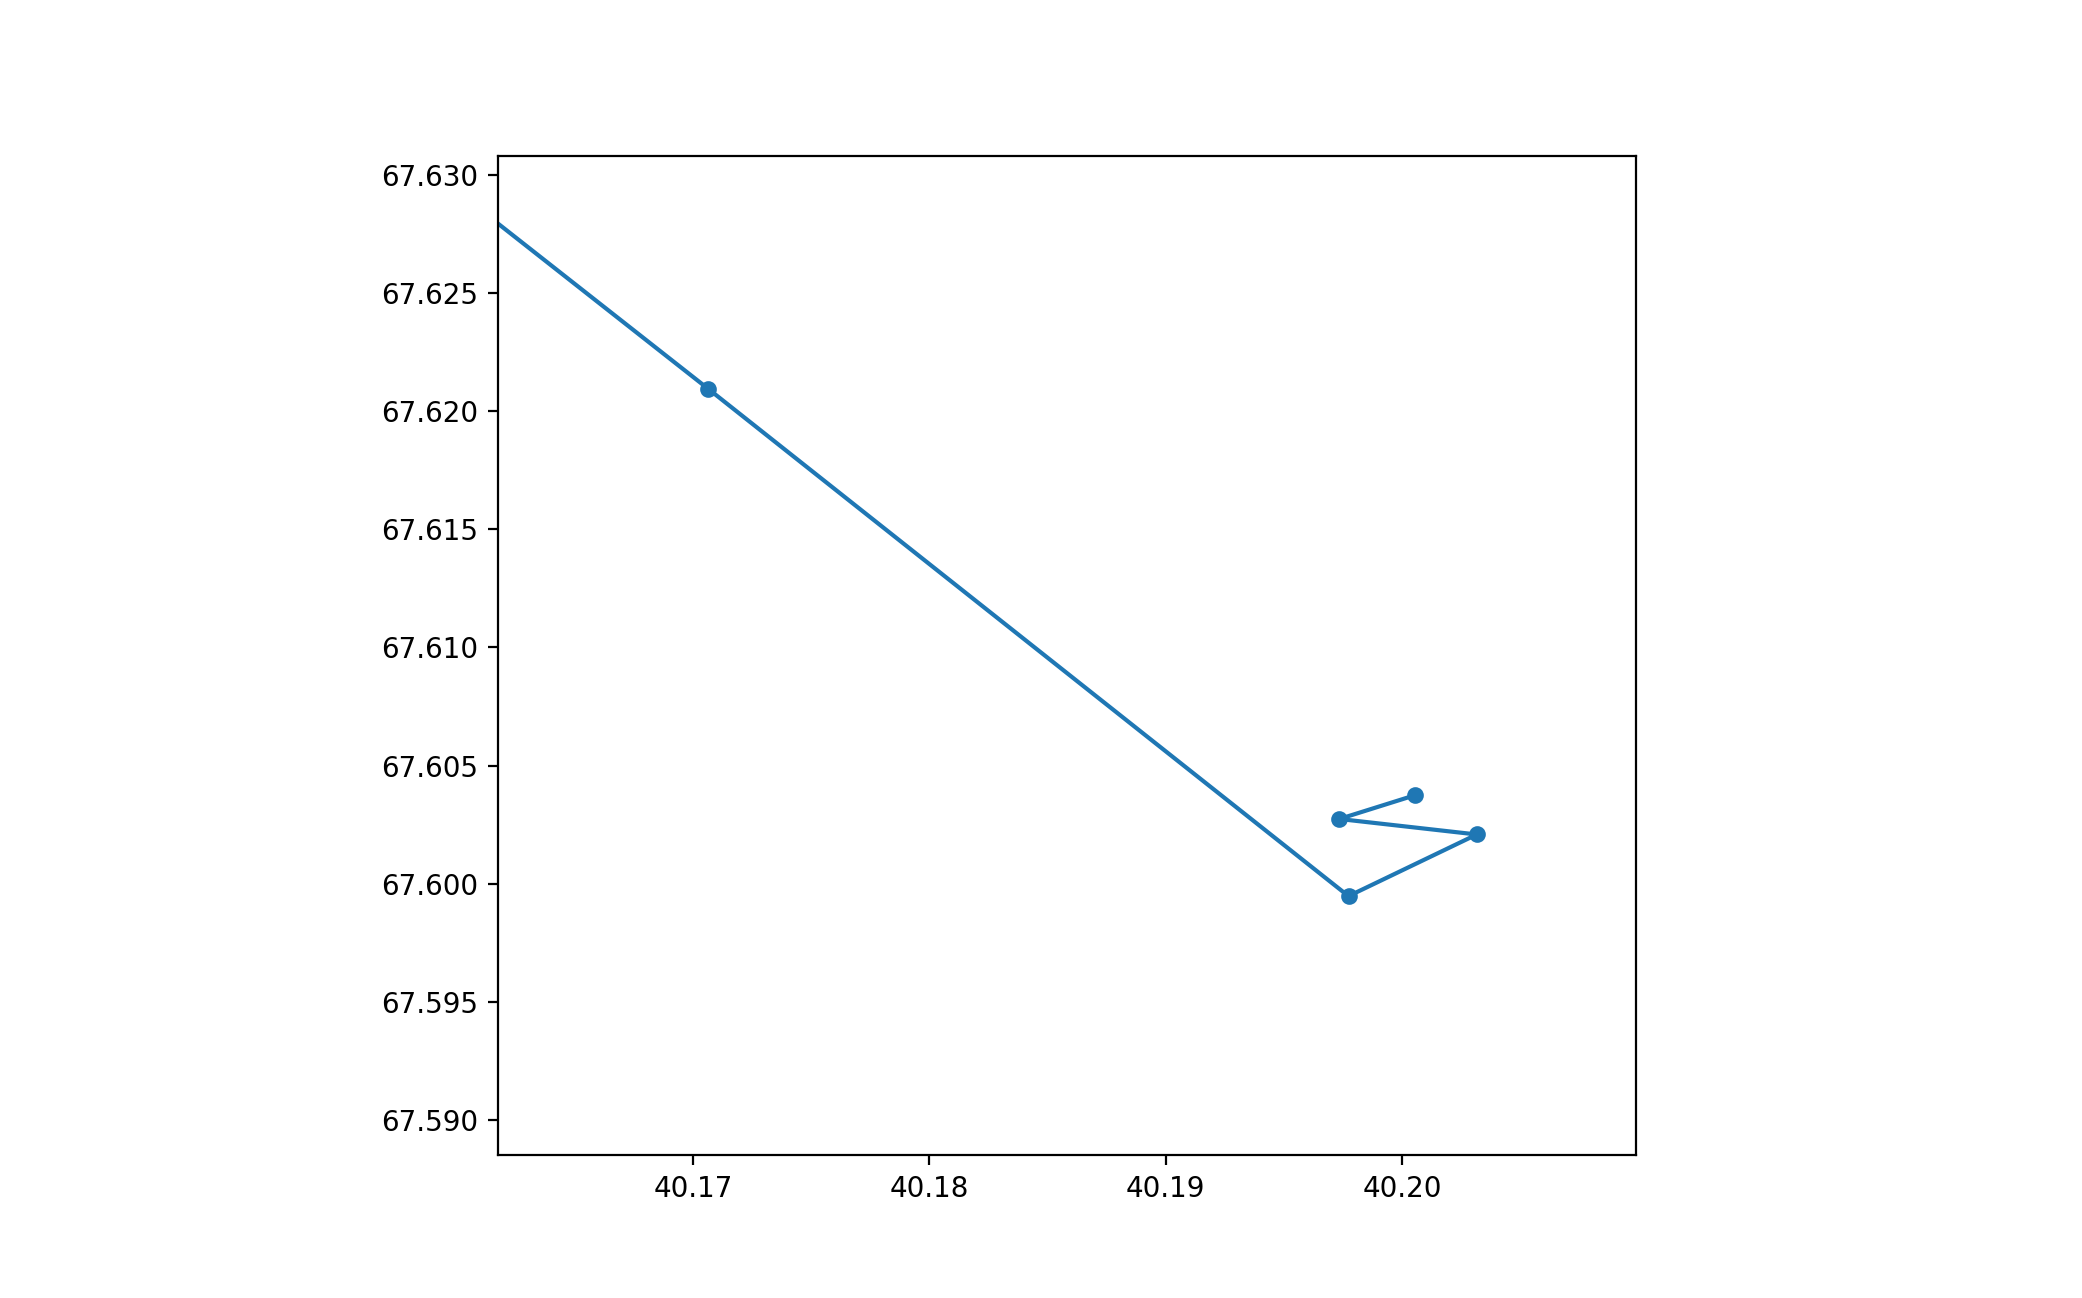

(61.0, 68.677383422851562)

In [8]:
# plot curve
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(8,6))
ax.plot(xs, ys, '.-', ms=10)
pad = 1 
ax.set_xlim(xs.min()-pad, xs.max()+pad)
ax.set_ylim(ys.min()-pad, ys.max()+pad)

# plot velocity vectors
# for i in range(n_pts):
#     ax.arrow(xs[i], ys[i], x_prime[i], y_prime[i],
#              head_width=0.01, head_length=0.02,
#              length_includes_head=True, fc='r', ec='r', zorder=10)

<IPython.core.display.Javascript object>


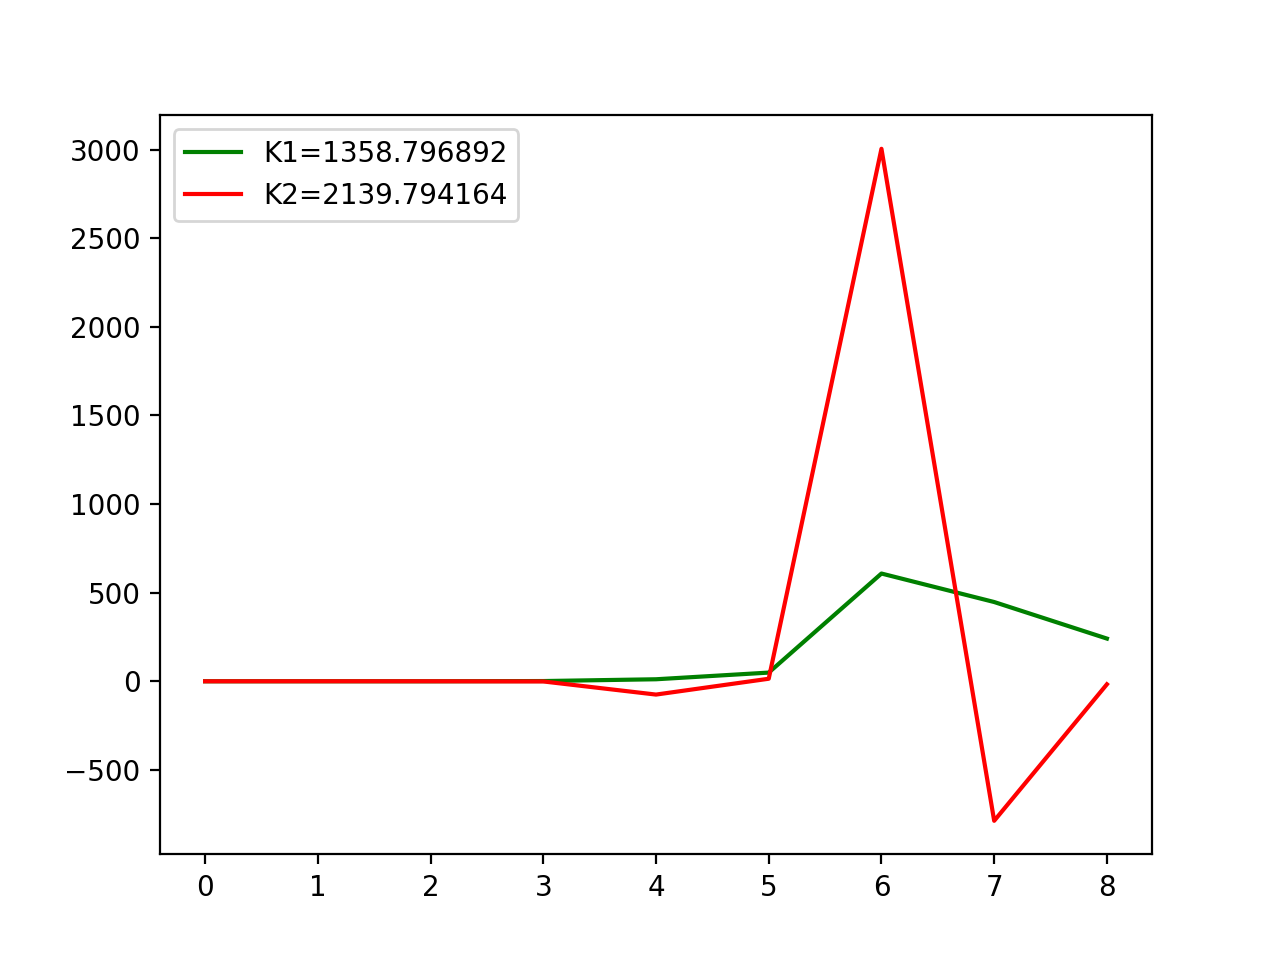

In [6]:
fig, ax = plt.subplots()
ax.plot(K1, 'g', label='K1={:.6f}'.format(np.sum(K1)))
ax.plot(K2, 'r', label='K2={:.6f}'.format(np.sum(K2)))
ax.legend()

In [7]:
print(K1)
print(K2)

[  8.70560190e-02   1.57439431e-01   1.32177639e-02   1.43849198e+00
   1.14857087e+01   4.91340191e+01   6.08085211e+02   4.47329233e+02
   2.41066515e+02]
[  4.38898454e-02   2.03736101e-01   1.67790521e-01  -8.38986741e-01
  -7.49015630e+01   1.44358981e+01   3.00462299e+03  -7.87124407e+02
  -1.68151842e+01]
